In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
import pandas as pd

df = pd.read_csv('heart.csv')

# Group by Age and Sex, sum HeartDisease counts
grouped_df = df.groupby(['Age', 'Sex'], as_index=False)['HeartDisease'].sum()


In [8]:
grouped_df[grouped_df["HeartDisease"] > 0]

,Age,Sex,HeartDisease
4,31,M,1
6,32,M,2
7,33,F,1
10,34,M,2
12,35,M,4
...,...,...,...
84,73,F,1
86,74,M,5
87,75,M,2
89,76,M,1


In [54]:
df["HeartDisease"] = df["HeartDisease"].astype(bool)
df["FastingBS"] = df["FastingBS"].astype(bool)

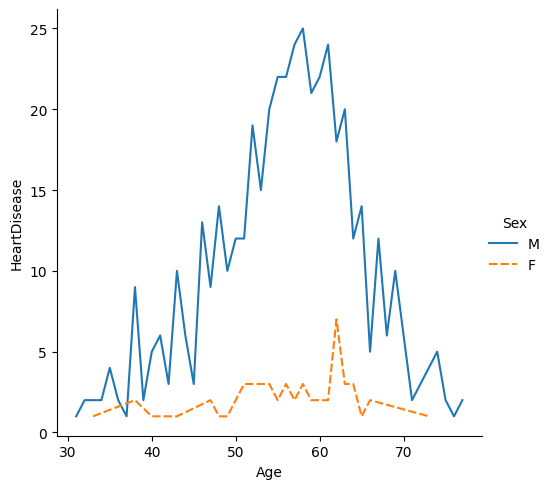

In [59]:
sns.relplot(
    data=grouped_df[grouped_df["HeartDisease"] > 0],
    x="Age", y="HeartDisease", hue="Sex", style="Sex", kind="line"
)

In [11]:
df.groupby("ChestPainType", as_index=False)["HeartDisease"].sum()

,ChestPainType,HeartDisease
0,ASY,392
1,ATA,24
2,NAP,72
3,TA,20


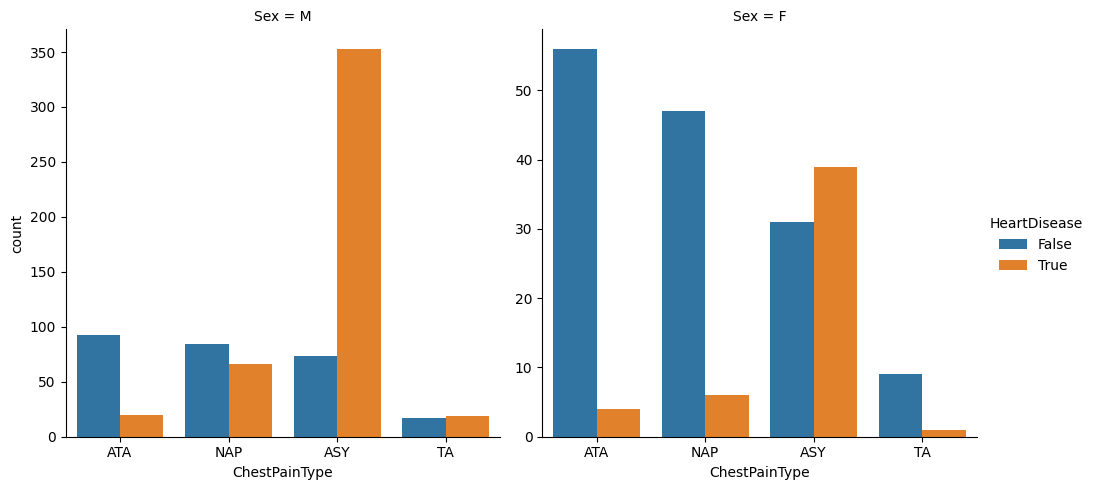

In [61]:
sns.catplot(df, x="ChestPainType", hue="HeartDisease", kind="count", col="Sex", sharey=False)

<Axes: xlabel='RestingBP', ylabel='MaxHR'>

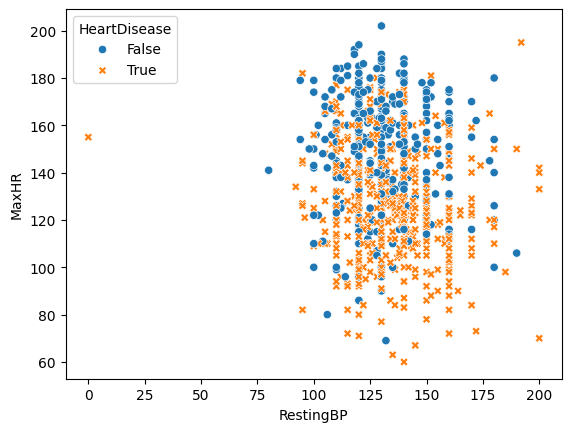

In [62]:
sns.scatterplot(df, x="RestingBP", y="MaxHR", hue="HeartDisease", style="HeartDisease")

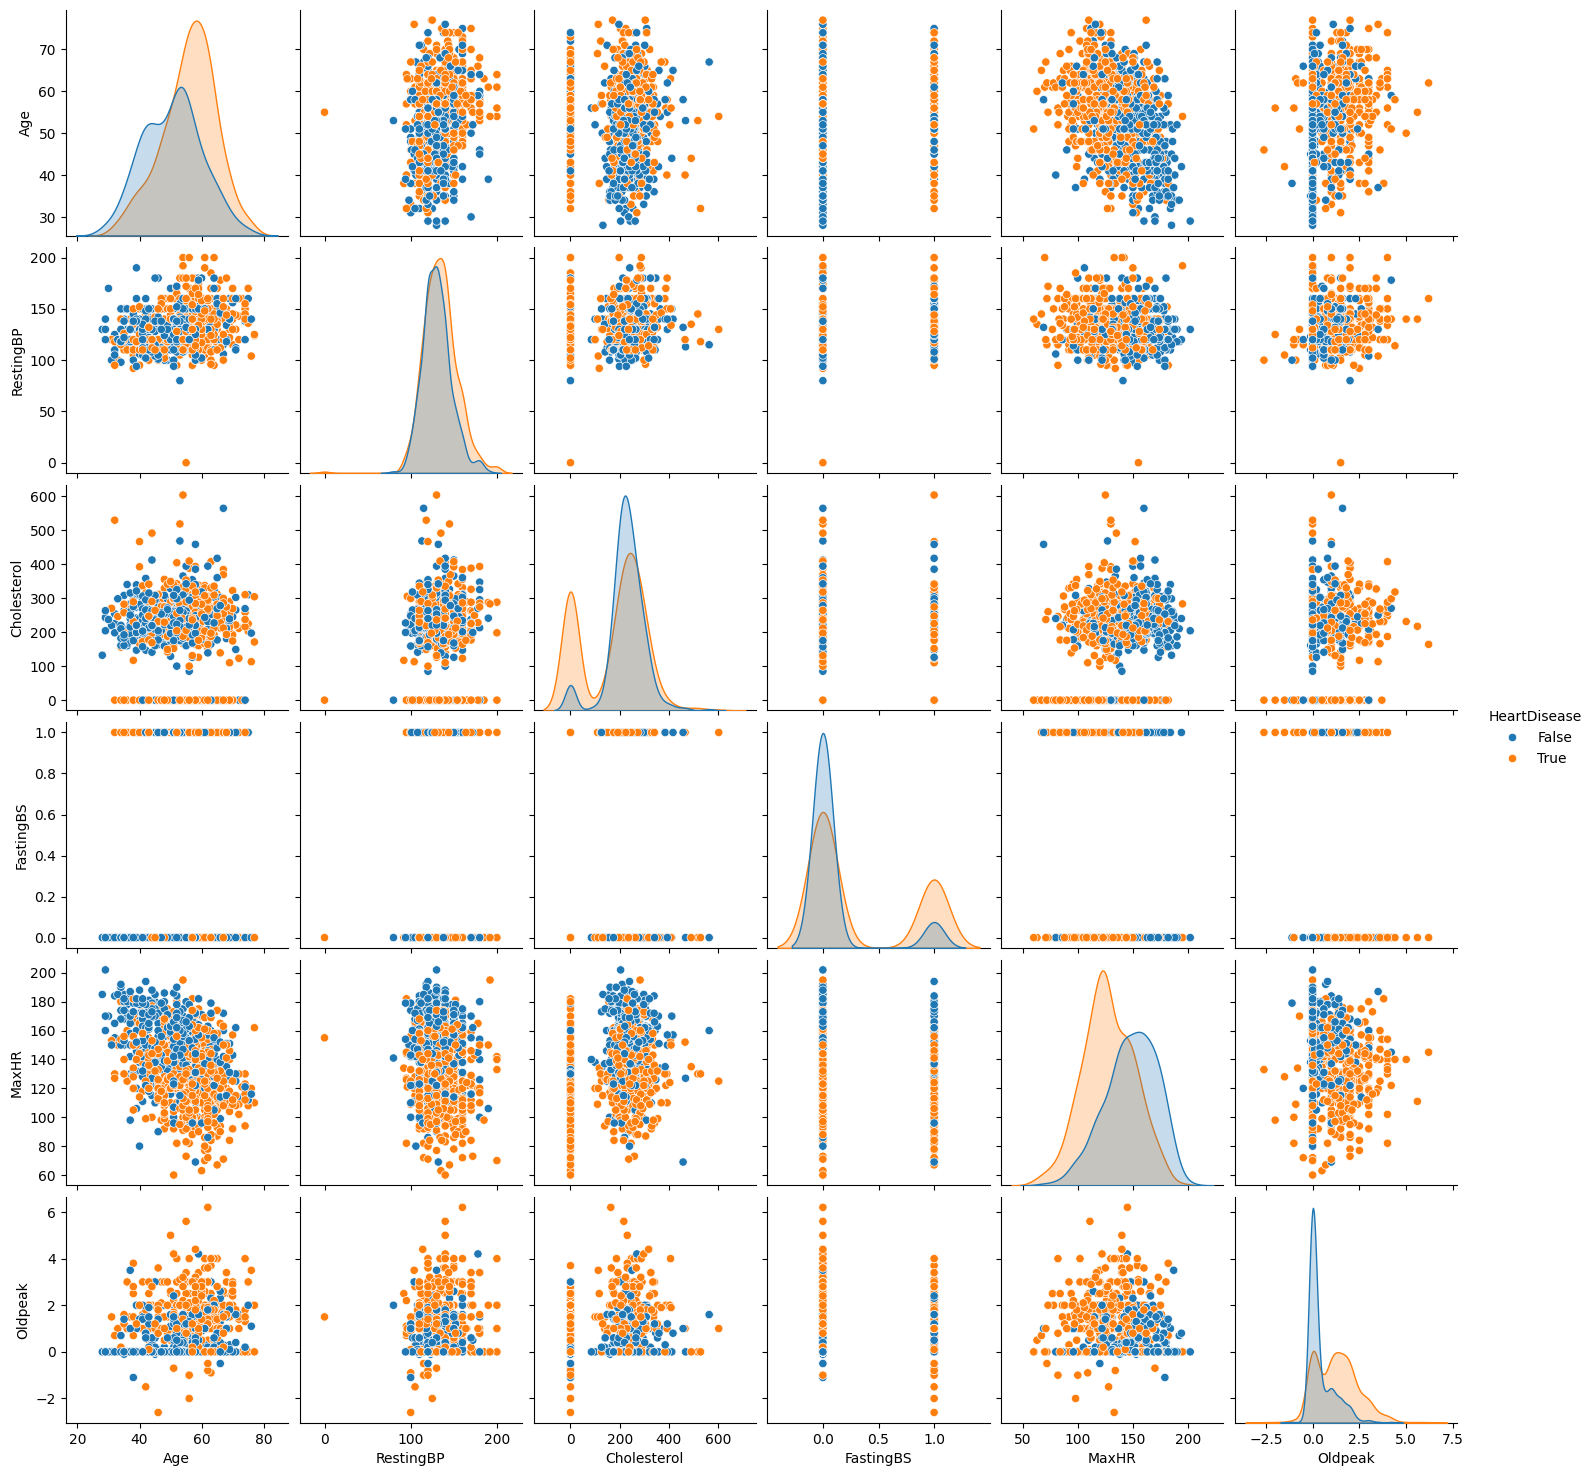

In [55]:
sns.pairplot(df, hue="HeartDisease")

In [56]:
df.select_dtypes(exclude="number").columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

Age min=28	max=77


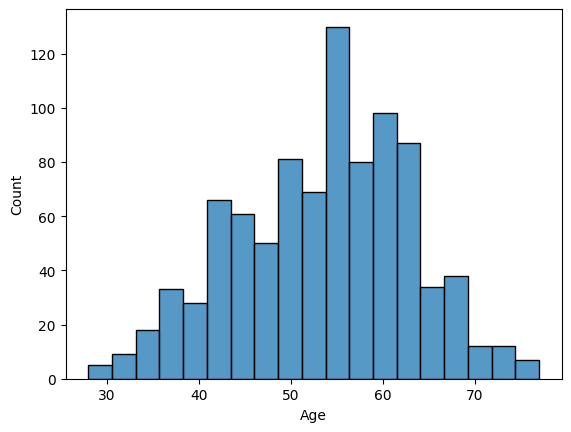

RestingBP min=0	max=200


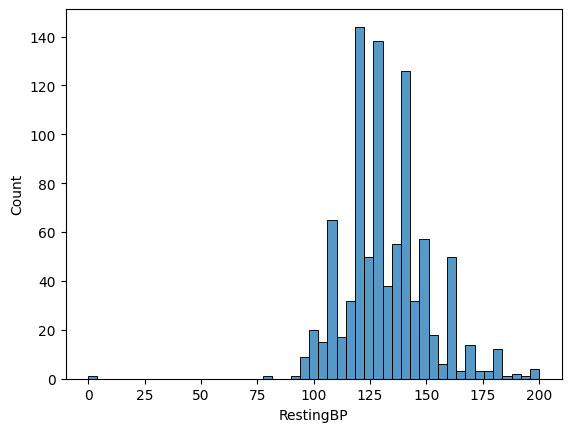

Cholesterol min=0	max=603


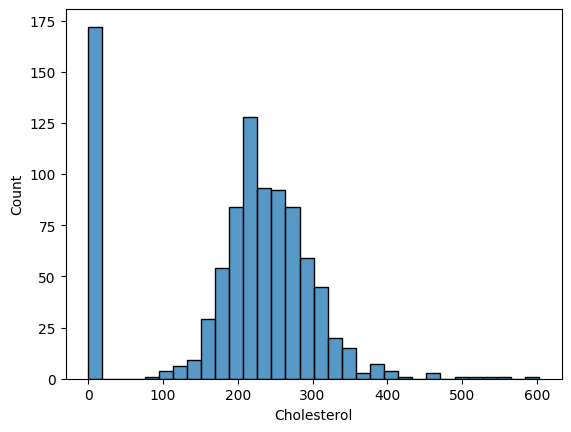

MaxHR min=60	max=202


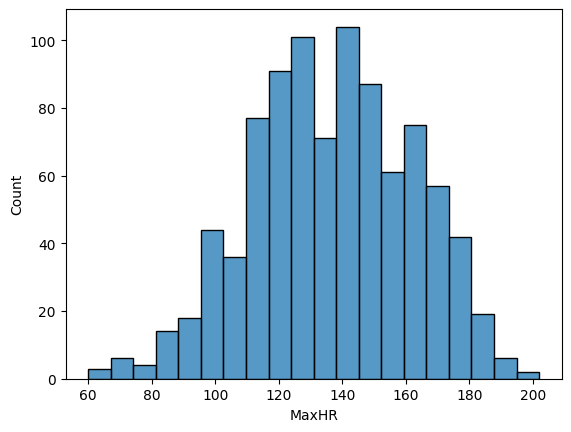

Oldpeak min=-2.6	max=6.2


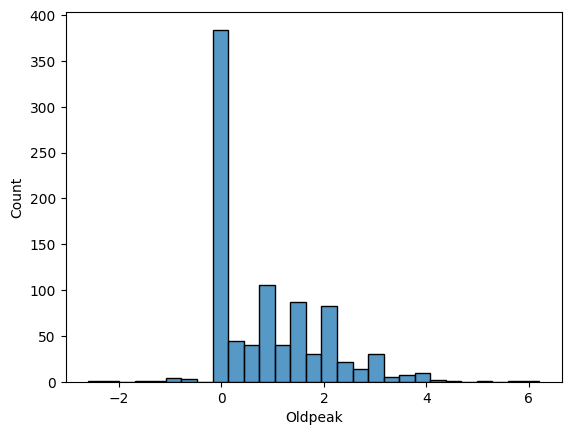

In [57]:
for c in df.select_dtypes(include="number").columns:
    sns.histplot(df[c])
    print(f"{c} min={min(df[c])}\tmax={max(df[c])}")
    plt.show()